# Convolutional Autoencoder

Sticking with the MNIST dataset, let's improve our autoencoder's performance using convolutional layers. Again, loading modules and the data.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import os 
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.utils import shuffle
from scipy.misc import imsave
from scipy.misc import imresize
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
from PIL import Image
import pickle
# from tensorflow_vgg import vgg16|
import collections
import time
import math

# Import GEI dataset 

(128, 88)


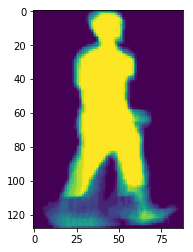

In [6]:
img = imread('{}'.format(os.path.join('./OULP-C1V2_Pack/OULP-GEI-(88x128)-10f/Seq00/0000024', '0000024_55_GEI_10f.png')))
# img = imresize(img, [64, 64], interp='nearest')
print(img.shape)
plt.imshow(img)
plt.show()

In [102]:
# Create Training Data
path = './OULP-C1V2_Pack/OULP-GEI-(88x128)-5f_5/Seq01'
Seq_10f_list = os.listdir(path)
# Seq_10f_list.remove('.DS_Store')

Seq = []
for each_seq in Seq_10f_list:
    seq_path = os.path.join(path, each_seq)
    GEI = []
    for each_GEI in os.listdir(seq_path):
        img = imread('{}'.format(os.path.join(seq_path, each_GEI)))
        img = imresize(img, [64, 64], interp='nearest')
        GEI.append(img)
    Seq.append(np.array(GEI))
Seq = np.array(Seq)
Seq1 = np.ndarray([len(Seq),4,64,64], dtype=float)
for ii, each in enumerate(Seq):
    Seq1[ii] = each

In [103]:
with open('../gait_data/OULP_GEI/GEI64x64_5f_5_Seq01', 'wb') as f:
    np.save(f, Seq1)

# Checkpoint 1

In [2]:
# Create Training Data
Subjects_list = np.load(open(r'../gait_data/OULP_GEI/GEI_subjects_list', mode='rb'))

GEI_1f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_1f_path', mode='rb'))
GEI_3f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_3f_path', mode='rb'))
# GEI_5f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_5f_path', mode='rb'))
# GEI_8f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_8f_path', mode='rb'))
# GEI_10f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_10f_path', mode='rb'))
# GEI_13f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_13f_path', mode='rb'))
# GEI_15f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_15f_path', mode='rb'))
# GEI_20f_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_20f_path', mode='rb'))
# GEI_full_path = np.load(open(r'../gait_data/OULP_GEI/GEI_all_full_path', mode='rb'))

# get train, validation, test data
train_x = np.array([])
train_y = np.array([])

val_x = np.array([])
val_y = np.array([])

test_x = np.array([])
test_y = np.array([])

for ii in range(0, 28):
    train_x = np.concatenate([train_x, GEI_3f_path[0 + ii*3146 : 2146 + ii*3146]], axis=0) 
    train_y = np.concatenate([train_y, GEI_5f_path[0 + ii*3146 : 2146 + ii*3146]], axis=0)
        
    val_x = np.concatenate([val_x, GEI_3f_path[2146 + ii*3146 : 2646 + ii*3146]], axis=0) 
    val_y = np.concatenate([val_y, GEI_5f_path[2146 + ii*3146 : 2646 + ii*3146]], axis=0)
        
    test_x = np.concatenate([test_x, GEI_3f_path[2646 + ii*3146 : 3146 + ii*3146]], axis=0) 
    test_y = np.concatenate([test_y, GEI_5f_path[2646 + ii*3146 : 3146 + ii*3146]], axis=0)

train_x, train_y = shuffle(train_x, train_y)
val_x, val_y = shuffle(val_x, val_y)
test_x, test_y = shuffle(test_x, test_y)

In [3]:
# gallery_8f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_1_Seq00', mode='rb'))
# probe_8f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_1_Seq01', mode='rb'))
# gallery_10f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_1_Seq00', mode='rb'))
# probe_10f = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_1_Seq01', mode='rb'))

# gallery_8f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_2_Seq00', mode='rb'))
# probe_8f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_2_Seq01', mode='rb'))
# gallery_10f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_2_Seq00', mode='rb'))
# probe_10f_2 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_2_Seq01', mode='rb'))

# gallery_8f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_3_Seq00', mode='rb'))
# probe_8f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_3_Seq01', mode='rb'))
# gallery_10f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_3_Seq00', mode='rb'))
# probe_10f_3 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_3_Seq01', mode='rb'))

# gallery_8f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_4_Seq00', mode='rb'))
# probe_8f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_4_Seq01', mode='rb'))
# gallery_10f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_4_Seq00', mode='rb'))
# probe_10f_4 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_4_Seq01', mode='rb'))

# gallery_8f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_5_Seq00', mode='rb'))
# probe_8f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_5_Seq01', mode='rb'))
# gallery_10f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_5_Seq00', mode='rb'))
# probe_10f_5 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_5_Seq01', mode='rb'))

# gallery_8f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_6_Seq00', mode='rb'))
# probe_8f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_8f_6_Seq01', mode='rb'))
# gallery_10f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_6_Seq00', mode='rb'))
# probe_10f_6 = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_10f_6_Seq01', mode='rb'))

In [4]:
# gallery_8f = gallery_8f/float(255)
# probe_8f = probe_8f/float(255)
# gallery_10f = gallery_10f/float(255)
# probe_10f = probe_10f/float(255)

# gallery_8f_2 = gallery_8f_2/float(255)
# probe_8f_2 = probe_8f_2/float(255)
# gallery_10f_2 = gallery_10f_2/float(255)
# probe_10f_2 = probe_10f_2/float(255)

# gallery_8f_3 = gallery_8f_3/float(255)
# probe_8f_3 = probe_8f_3/float(255)
# gallery_10f_3 = gallery_10f_3/float(255)
# probe_10f_3 = probe_10f_3/float(255)

# gallery_8f_4 = gallery_8f_4/float(255)
# probe_8f_4 = probe_8f_4/float(255)
# gallery_10f_4 = gallery_10f_4/float(255)
# probe_10f_4 = probe_10f_4/float(255)

# gallery_8f_5 = gallery_8f_5/float(255)
# probe_8f_5 = probe_8f_5/float(255)
# gallery_10f_5 = gallery_10f_5/float(255)
# probe_10f_5 = probe_10f_5/float(255)

# gallery_8f_6 = gallery_8f_6/float(255)
# probe_8f_6 = probe_8f_6/float(255)
# gallery_10f_6 = gallery_10f_6/float(255)
# probe_10f_6 = probe_10f_6/float(255)

<br><br><br><br><br><br><br><br><br>

In [5]:
# # Train X
# train_x = np.concatenate([gallery_8f[:2146, 3], probe_8f[:2146, 3], gallery_8f_2[:2146, 3], 
#                           probe_8f_2[:2146, 3], gallery_8f_3[:2146, 3], probe_8f_3[:2146, 3],
#                           gallery_8f_4[:2146, 3], probe_8f_4[:2146, 3], gallery_8f_5[:2146, 3], 
#                           probe_8f_5[:2146, 3], gallery_8f_6[:2146, 3], probe_8f_6[:2146, 3]], axis=0)
# train_x = np.reshape(train_x, [train_x.shape[0], train_x.shape[1], train_x.shape[2], 1])
# # Train Y
# train_y = np.concatenate([gallery_10f[:2146, 3], probe_10f[:2146, 3], gallery_10f_2[:2146, 3], 
#                           probe_10f_2[:2146, 3], gallery_10f_3[:2146, 3], probe_10f_3[:2146, 3],
#                           gallery_10f_4[:2146, 3], probe_10f_4[:2146, 3], gallery_10f_5[:2146, 3], 
#                           probe_10f_5[:2146, 3], gallery_10f_6[:2146, 3], probe_10f_6[:2146, 3]], axis=0)
# train_y = np.reshape(train_y, [train_y.shape[0], train_y.shape[1], train_y.shape[2], 1])
# print('train_x', train_x.shape, 'train_y', train_y.shape)

# # Val X
# val_x = np.concatenate([gallery_8f[2146:2646, 3], gallery_8f_2[2146:2646, 3], gallery_8f_3[2146:2646, 3],
#                         gallery_8f_4[2146:2646, 3], gallery_8f_5[2146:2646, 3], gallery_8f_6[2146:2646, 3],
#                         probe_8f[2146:2646, 3], probe_8f_2[2146:2646, 3], probe_8f_3[2146:2646, 3], 
#                         probe_8f_4[2146:2646, 3], probe_8f_5[2146:2646, 3], probe_8f_6[2146:2646, 3]], axis=0)
# val_x = np.reshape(val_x, [val_x.shape[0], val_x.shape[1], val_x.shape[2], 1])
# # Val Y
# val_y = np.concatenate([gallery_10f[2146:2646, 3], gallery_10f_2[2146:2646, 3], gallery_10f_3[2146:2646, 3], 
#                         gallery_10f_4[2146:2646, 3], gallery_10f_5[2146:2646, 3], gallery_10f_6[2146:2646, 3], 
#                         probe_10f[2146:2646, 3], probe_10f_2[2146:2646, 3], probe_10f_3[2146:2646, 3], 
#                         probe_10f_4[2146:2646, 3], probe_10f_5[2146:2646, 3], probe_10f_6[2146:2646, 3]], axis=0)
# val_y = np.reshape(val_y, [val_y.shape[0], val_y.shape[1], val_y.shape[2], 1])
# print('val_x', val_x.shape, 'val_y', val_y.shape)

# # Test X
# test_x = np.concatenate([gallery_8f[2646:, 3], gallery_8f_2[2646:, 3], gallery_8f_3[2646:, 3],
#                          gallery_8f_4[2646:, 3], gallery_8f_5[2646:, 3], gallery_8f_6[2646:, 3], 
#                          probe_8f[2646:, 3], probe_8f_2[2646:, 3], probe_8f_3[2646:, 3],
#                          probe_8f_4[2646:, 3], probe_8f_5[2646:, 3], probe_8f_6[2646:, 3]], 
#                         axis=0)
# test_x = np.reshape(test_x, [test_x.shape[0], test_x.shape[1], test_x.shape[2], 1])
# # Test Y
# test_y = np.concatenate([gallery_10f[2646:, 3], gallery_10f_2[2646:, 3], gallery_10f_3[2646:, 3], 
#                          gallery_10f_4[2646:, 3], gallery_10f_5[2646:, 3], gallery_10f_6[2646:, 3], 
#                          probe_10f[2646:, 3], probe_10f_2[2646:, 3], probe_10f_3[2646:, 3], probe_10f_4[2646:, 3], 
#                          probe_10f_5[2646:, 3], probe_10f_6[2646:, 3]], axis=0)
# test_y = np.reshape(test_y, [test_y.shape[0], test_y.shape[1], test_y.shape[2], 1])
# print('test_x', test_x.shape, 'test_y', test_y.shape)

# Create Graph

In [3]:
def get_batches(Subjects_path_X, Subjects_path_Y, batch_size):
    
    n_batches = len(Subjects_path_X)//batch_size
    for ii in range(0, batch_size*n_batches, batch_size):
        data_batch = []
        target_batch = []
        for each_path_X, each_path_Y in zip(Subjects_path_X[ii:ii + batch_size], Subjects_path_Y[ii:ii + batch_size]):
            img_X = imread('{}'.format(each_path_X))
            img_Y = imread('{}'.format(each_path_Y))
            img_X = imresize(img_X, [64, 64], interp='nearest')
            img_Y = imresize(img_Y, [64, 64], interp='nearest')
            
            data_batch.append(img_X)
            target_batch.append(img_Y)
        data_batch = np.array(data_batch)/float(255)
        target_batch = np.array(target_batch)/float(255)
        
        data_batch = np.reshape(data_batch, [data_batch.shape[0], data_batch.shape[1], data_batch.shape[2], 1])
        target_batch = np.reshape(target_batch, [target_batch.shape[0], target_batch.shape[1], target_batch.shape[2], 1])
    
        yield shuffle(data_batch, target_batch)

def cal_accuracy(decoded, target):
    error = abs(decoded - target)
    Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]*decoded.shape[2]*decoded.shape[3]))*100
    
    return Acc

In [4]:
def build_inputs_outputs():
    inputs_1 = tf.placeholder(tf.float32, (None, 64, 64, 1), name='inputs_1')
    targets_1 = tf.placeholder(tf.float32, (None, 64, 64, 1), name='targets_1')
    
    return inputs_1, targets_1

def conv_layer(inputs_, weights_name, bias_name, conv_name, pool_name, bn_name, relu_name, add_bacth_norm=True, is_training=True, 
               set_stddev=0.03, out_dim=1, conv_kernsize=(2,2), conv_strides=(1,1), pool_size=(2,2), pool_strides=(2,2), 
               keep_prob=0.5):
    ### Encoder
    # e.g. out_dim: 8; kern_size: (3,3); pool_size: (2,2); strides: (2,2);
        
    # filter:[filter_height, filter_width, in_channels, out_channels]
    weight = tf.Variable(tf.truncated_normal([conv_kernsize[0],conv_kernsize[1],\
                         inputs_.get_shape().as_list()[3], out_dim], stddev=set_stddev),\
                         name=weights_name) 
    
    # Set bias
    bias = tf.Variable(tf.zeros(out_dim), name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    # input:[batch, in_height, in_width, in_channels]
    conv2d = tf.nn.bias_add(tf.nn.conv2d(inputs_, weight, stride, padding='SAME', name=conv_name), bias)
    
    # add activation function
    conv2d = tf.nn.relu(conv2d, name=relu_name)
    
    # add Max pooling
    conv2d = tf.nn.max_pool(conv2d, [1,pool_size[0],pool_size[1],1],\
                                    [1,pool_strides[0],pool_strides[1],1], padding='SAME', name=pool_name)   
    # Now 28x28x
    if add_bacth_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)
        
    conv2d_maxpool = tf.layers.dropout(conv2d, rate=keep_prob)
        
    return conv2d_maxpool

#     # Now 14x14x16
#     conv2 = tf.layers.conv2d(maxpool1, 8, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 14x14x8
#     maxpool2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
#     # Now 7x7x8
#     conv3 = tf.layers.conv2d(maxpool2, 8, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 7x7x8
#     encoded = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
#     # Now 4x4x8

def deconv_layer(encoded, up_name, weights_name, bias_name, de_conv_name, bn_name, relu_name, add_batch_norm=True, is_training=True, 
                 set_stddev=0.03, up_size=[(2,2),(4,4),(5,5),(6,6)], out_dim=1, conv_kernsize=(2,2), conv_strides=(1,1), keep_prob=0.5):
    ### Decoder
    upsample = tf.image.resize_nearest_neighbor(encoded, up_size, name=up_name) # up_size: e.g.(7,7)
    
    # set weight (filter)
    weight = tf.Variable(tf.truncated_normal([conv_kernsize[0],conv_kernsize[1],\
                         upsample.get_shape().as_list()[3], out_dim], stddev=set_stddev),\
                         name=weights_name)
    
    # set bias
    bias = tf.Variable(tf.zeros(out_dim), name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    conv2d = tf.nn.bias_add(tf.nn.conv2d(upsample, weight, stride, padding='SAME', name=de_conv_name),\
                   bias)
    
    conv2d = tf.nn.relu(conv2d, name=relu_name)
    
    if add_batch_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)
    
    conv2d = tf.layers.dropout(conv2d, rate=keep_prob)
    
    return conv2d

#     # Now 7x7x8
#     upsample2 = tf.image.resize_nearest_neighbor(conv4, (14,14))
#     # Now 14x14x8
#     conv5 = tf.layers.conv2d(upsample2, 8, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 14x14x8
#     upsample3 = tf.image.resize_nearest_neighbor(conv5, (28,28))
#     # Now 28x28x8
#     conv6 = tf.layers.conv2d(upsample3, 16, (3,3), padding='same', activation=tf.nn.relu)
#     # Now 28x28x16

def output_layer(conv2d, weights_name, bias_name, logits_name, bn_name, decoded_name, add_batch_norm=True, is_training=True, 
                 set_stddev=0.03, out_dim=1, conv_kernsize=(3,3), conv_strides=(1,1)):
    # set weight (filter)
    weight = tf.Variable(tf.truncated_normal([conv_kernsize[0],conv_kernsize[1],\
                         conv2d.get_shape().as_list()[3], out_dim], stddev=set_stddev),\
                         name=weights_name)
    
    # set bias
    bias = tf.Variable(tf.zeros(out_dim), name=bias_name)
    
    # set strides of conv2d
    stride = [1, conv_strides[0], conv_strides[1], 1]
    
    # conv2d
    logits = tf.nn.bias_add(tf.nn.conv2d(conv2d, weight, stride, padding='SAME', name=logits_name),\
                   bias)
    
    if add_batch_norm:
        conv2d = tf.layers.batch_normalization(conv2d, training=is_training, name=bn_name)
    #Now 28x28x1
    decoded = tf.nn.sigmoid(logits, name=decoded_name)
    
    return logits, decoded

In [5]:
def build_graph(kern_size, std, conv_strides, pool_size, pool_strides, de_kern_size, 
                de_conv_strides, out_kern_size, out_strides, up_size=[(16,16), (32,32), (64,64)]):
    
    # reset graph
    tf.reset_default_graph()
    
    with tf.name_scope('inputs_targets'):
        inputs_1, targets_1 = build_inputs_outputs()
    
    keep_p = tf.placeholder(tf.float32, name="keep_prob")
    
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    
    training = tf.placeholder(tf.bool, name='training')
    
    with tf.name_scope('conv_layers'):
        
        maxpool_1 = conv_layer(inputs_1, 'conv_weights_1', 'bias_1', 'conv_1', 'pool_1', 'bn_1', 'relu_1', add_bacth_norm=False, 
                               is_training=training, set_stddev=std, out_dim=128, conv_kernsize=kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        
        maxpool_2 = conv_layer(maxpool_1, 'conv_weights_2', 'bias_2', 'conv_2', 'pool_2', 'bn_2', 'relu_2', add_bacth_norm=True, 
                               is_training=training, set_stddev=std, out_dim=64, conv_kernsize=kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        
        maxpool_3 = conv_layer(maxpool_2, 'conv_weights_3', 'bias_3', 'conv_3', 'pool_3', 'bn_3', 'relu_3', add_bacth_norm=True, 
                               is_training=training, set_stddev=std, out_dim=32, conv_kernsize=kern_size, conv_strides=conv_strides, 
                               pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        
#         maxpool_4 = conv_layer(maxpool_3, 'conv_weights_4', 'bias_4', 'conv_4', 'pool_4', 'bn_4', 'relu_4', add_bacth_norm=True, 
#                                is_training=training, set_stddev=std, out_dim=8, conv_kernsize=kern_size, conv_strides=conv_strides, 
#                                pool_size=pool_size, pool_strides=pool_strides, keep_prob=keep_p)
        # Now 4x4x8 as hidden layer
        
    with tf.name_scope('deconv_layers'):
        
        deconv_1 = deconv_layer(maxpool_3, 'up_1', 'deconv_weights_1', 'debias_1', 'deconv_1', 'de_bn_1', 'de_relu_1', add_batch_norm=True, 
                              is_training=training, set_stddev=std, up_size=up_size[0], out_dim=32, conv_kernsize=de_kern_size,
                              conv_strides=de_conv_strides, keep_prob=keep_p)
        
        deconv_2 = deconv_layer(deconv_1, 'up_2', 'deconv_weights_2', 'debias_2', 'deconv_2', 'de_bn_2', 'de_relu_2', add_batch_norm=True, 
                              is_training=training, set_stddev=std, up_size=up_size[1], out_dim=64, conv_kernsize=de_kern_size,
                              conv_strides=de_conv_strides, keep_prob=keep_p)
        
        deconv_3 = deconv_layer(deconv_2, 'up_3', 'deconv_weights_3', 'debias_3', 'deconv_3', 'de_bn_3', 'de_relu_3', add_batch_norm=True, 
                              is_training=training, set_stddev=std, up_size=up_size[2], out_dim=128, conv_kernsize=de_kern_size,
                              conv_strides=de_conv_strides, keep_prob=keep_p)
        
#         deconv_4 = deconv_layer(deconv_3, 'up_4', 'deconv_weights_4', 'debias_4', 'deconv_4', 'de_bn_4', 'de_relu_4', add_batch_norm=True, 
#                               is_training=training, set_stddev=std, up_size=up_size[3], out_dim=64, conv_kernsize=de_kern_size,
#                               conv_strides=de_conv_strides, keep_prob=keep_p)
        
    with tf.name_scope('output_layer'):
       
        logits, decoded = output_layer(deconv_3, 'output_weights', 'outbias_1', 'logits', 'bn', 'decoded', add_batch_norm=False, is_training=training, 
                                       set_stddev=std, out_dim=1, conv_kernsize=out_kern_size, conv_strides=out_strides)
    
    MSE = tf.reduce_mean(tf.losses.mean_squared_error(targets_1, decoded), name='MSE')
    loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_1, logits=logits, name='loss')
    cost = tf.reduce_mean(loss, name='cost')
#     cost = tf.losses.mean_squared_error(targets_1, decoded)
    opt = tf.train.AdamOptimizer(learning_rate).minimize(MSE)
    
    with tf.name_scope('saver'):
        saver = tf.train.Saver()
        
#     merged = tf.summary.merge_all()
    
    export_nodes = ['inputs_1', 'targets_1', 'maxpool_1', 'maxpool_2', 'maxpool_3', 'deconv_1', 'deconv_2', 
                    'deconv_3', 'training', 'logits', 'decoded', 'loss', 'cost', 'opt', 'saver', 'learning_rate', 'keep_p', 'MSE']
    
    Graph = collections.namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])
    
    return graph

In [6]:
# def get_batches(data, target, batch_size):
#     n_batches = len(data)//batch_size
#     data = data[:batch_size * n_batches]
#     target = target[:batch_size * n_batches]
#     for ii in range(0, batch_size*n_batches, batch_size):
#         data_batch = data[ii:ii + batch_size]
#         target_batch = target[ii:ii + batch_size]
        
#         yield data_batch, target_batch
        
        
# def cal_accuracy(decoded, target):
#     error = abs(decoded - target)
#     Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]*decoded.shape[2]*decoded.shape[3]))*100
    
#     return Acc

In [8]:
def train(model, epochs, save_string):
    
    with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
        sess.run(tf.global_variables_initializer())
        
        iteration = 1
        mean_val_loss = 0
        mean_val_mse = 0
        mean_val_acc = 0
        count_loss_not_decrease_epochs = 0
        count_acc_not_decrease_epochs = 0
        Last_val_loss = 0
        Last_val_mse = 0
        Last_val_acc = 0
        
        last_saved_acc = 0
        val_batch_size = 50
        
        for e in range(epochs):
            for train_batch, target_batch in get_batches(train_x, train_y, batch_size):
                    
                start = time.time()
                
                feed_1 = {
                        model.inputs_1: train_batch, 
                        model.targets_1: target_batch,
                        model.keep_p: 0.5,
                        model.learning_rate: lr,
                        model.training:True
                        }

                _, decoded_img, train_mse = sess.run([model.opt, model.decoded, model.MSE], feed_dict=feed_1)
                
                train_acc = cal_accuracy(decoded_img, target_batch)
                
                if iteration%25==0:
                    end = time.time()
#                     acc = calculate_accuracy(sess, pred, target_batch, sq_length)
                    print("Epoch: {}/{},".format(e+1, epochs),' '
                          "Iteration: {},".format(iteration),' '
        
                          "Train MSE: {:.4f},".format(train_mse),' '
                          "{:.1f}s /batch.".format((end-start)/5),' '
                          "Train Accuracy: %{:.3f}".format(train_acc))

                ##############################################################
                ######################## VALIDATION ##########################
                ##############################################################
                
                if iteration%35==0:
#                     training = True
#                     validation_loss = []
                    validation_mse = []
                    validation_acc = []
                    
#                     if batch_size >= len(val_x):
#                         val_batch_size = len(val_x)
#                     else: 
#                         val_batch_size = batch_size
                        

                    for ii, (val_batch, val_target_batch) in enumerate(get_batches(val_x, val_y, val_batch_size)):
#                         print(ii, len(val_x)//val_batch_size)
                        feed_2 = {
                                model.inputs_1: val_batch,
                                model.targets_1: val_target_batch,
                                model.keep_p: 1,
                                model.training:True
                                }
                        
                        val_decoded_img, val_mse = sess.run([model.decoded, model.MSE], 
                                                                          feed_dict=feed_2)

                        val_acc = cal_accuracy(val_decoded_img, val_target_batch)
                        
                        
                        validation_mse.append(val_mse)
                        validation_acc.append(val_acc)
                    
                    
                    Last_val_mse = mean_val_mse
                    Last_val_acc = mean_val_acc
                    
                    mean_val_mse = np.mean(np.array(validation_mse))
                    mean_val_acc = np.mean(np.array(validation_acc))
                    
                    print()
                    print(
                          "Validation mse: {:.4f},".format(mean_val_mse),' '
                          "Validation accuracy: %{:.3f},".format(mean_val_acc))
#                           "maxpool_3.shape: {}.".format(max_pool_3[0].shape))
                    print()
        
                    if (mean_val_acc > 89) & (mean_val_acc > last_saved_acc):
                        model.saver.save(sess, r"{}".format(save_string)) 
                        last_saved_acc = mean_val_acc
                        print('###################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
                        
                        
#                     if mean_val_acc > 93.2:
#                         model.saver.save(sess, r"{}".format(save_string)) 
#                         print('###################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 91:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('###################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 91.5:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('####################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 92.0:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('###################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 92.5:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('####################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 93.0:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('####################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
#                     if mean_val_acc > 93.5:
#                         saver.save(sess, r"{}".format(save_string)) 
#                         print('####################################model been saved， mean accuracy={:.4f}, measn MSE={:.4f}'.format(mean_val_acc, mean_val_mse))
#                         is_save = True
                ####### plot #######
#                 if iteration%500==0:
                    
#                     feed_3 = {
#                             model.inputs_1: val_x[:10],
#                             model.keep_p: 1,
#                             model.training:True
#                             }
                    
#                     fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))
#                     in_imgs = val_x[:10]
#                     target_imgs = val_y[:10]
#                     reconstructed = sess.run(model.decoded, feed_dict=feed_3)

##                     plot out
#                     for images, row in zip([in_imgs, target_imgs, reconstructed], axes):
#                         for img, ax in zip(images, row):
#                             ax.imshow(img.reshape((64, 64)), cmap='Greys_r')
#                             ax.get_xaxis().set_visible(False)
#                             ax.get_yaxis().set_visible(False)


#                     fig.tight_layout(pad=0.1)
                            
                    
                    
                    
                    
                iteration += 1
                
            # Early stopping 
#             if mean_val_acc > 89:
#                 break
#             if mean_val_Acc - Last_val_Acc <= -0.3:
#                 count_Acc_not_increase_epochs += 1
#             if Last_val_loss - mean_val_loss <= -0.01:
#                 count_loss_not_decrease_epochs += 1
                
#             if mean_val_Acc - Last_val_Acc <= -2:
#                 break
#             if count_Acc_not_increase_epochs >= 10:
#                 break
#             if count_loss_not_decrease_epochs >= 10:
#                 break
                
        model.saver.save(sess, r"{}".format(save_string))

In [9]:
!mkdir checkpoints_view_invariant

dimension = 128
epochs = 3000
num_layers = 3
batch_size = 80
conv_kern_size = (4,4) #
conv_strides = (1,1) ##
pool_size = (2,2)
pool_strides = (2,2)
# up_size = [(8,8), (16,16), (32,32), (64,64)]
up_size = [(16,16), (32,32), (64,64)]
# up_size = [(32,32), (64,64)]
de_kern_size = (4,4) #
de_conv_strides = (1,1) ##
out_kern_size = (4,4) #
out_strides = (1,1)
std = 0.02

for lr in [0.00006]:
#                 log_string = 'logs/4/lr={},nl={},ls={},bs={}'.format(lr, num_layers, lstm_size, batch_size)
    save_string = './checkpoints_view_invariant/3to5_add-more-data_lr={}_nl={}_bs={}_dim={}.ckpt'.format(
                                                                            lr, num_layers, batch_size, dimension)
                
#             writer to_frame= tf.summary.FileWriter(log_string)
#     build_graph(kern_size, std, conv_strides, pool_size, pool_strides, de_kern_size, 
#                 de_conv_strides, out_kern_size, out_strides, up_size=[(16,16), (32,32), (64,64)], set_is_training=True):
    
    model = build_graph(conv_kern_size, std, conv_strides, pool_size, pool_strides, de_kern_size, de_conv_strides,
                        out_kern_size, out_strides, up_size=up_size)

    train(model, epochs, save_string)
                
    print(' ')
    print(' ')
    print("leraning_rate={},num_layers={},batch_size={} finished, saved".format(lr, num_layers, batch_size))
    print(' ')
    print(' ')

子目录或文件 checkpoints_view_invariant 已经存在。


Epoch: 1/3000,  Iteration: 25,  Train MSE: 0.0369,  0.1s /batch.  Train Accuracy: %38.313

Validation mse: 0.0270,  Validation accuracy: %51.977,

Epoch: 1/3000,  Iteration: 50,  Train MSE: 0.0206,  0.1s /batch.  Train Accuracy: %63.409

Validation mse: 0.0169,  Validation accuracy: %69.655,

Epoch: 1/3000,  Iteration: 75,  Train MSE: 0.0155,  0.1s /batch.  Train Accuracy: %70.896
Epoch: 1/3000,  Iteration: 100,  Train MSE: 0.0134,  0.1s /batch.  Train Accuracy: %75.360

Validation mse: 0.0132,  Validation accuracy: %75.955,

Epoch: 1/3000,  Iteration: 125,  Train MSE: 0.0119,  0.1s /batch.  Train Accuracy: %77.652

Validation mse: 0.0113,  Validation accuracy: %79.176,

Epoch: 1/3000,  Iteration: 150,  Train MSE: 0.0110,  0.1s /batch.  Train Accuracy: %79.494
Epoch: 1/3000,  Iteration: 175,  Train MSE: 0.0094,  0.1s /batch.  Train Accuracy: %81.605

Validation mse: 0.0101,  Validation accuracy: %80.856,

Epoch: 1/3000,  Iteration: 200,  Train MSE: 0.0087,  0.1s /batch.  Train Accuracy


Validation mse: 0.0041,  Validation accuracy: %88.454,

Epoch: 3/3000,  Iteration: 1600,  Train MSE: 0.0037,  0.1s /batch.  Train Accuracy: %88.900

Validation mse: 0.0040,  Validation accuracy: %88.334,

Epoch: 3/3000,  Iteration: 1625,  Train MSE: 0.0040,  0.1s /batch.  Train Accuracy: %88.858

Validation mse: 0.0040,  Validation accuracy: %88.531,

Epoch: 3/3000,  Iteration: 1650,  Train MSE: 0.0034,  0.1s /batch.  Train Accuracy: %89.600
Epoch: 3/3000,  Iteration: 1675,  Train MSE: 0.0038,  0.1s /batch.  Train Accuracy: %88.537

Validation mse: 0.0040,  Validation accuracy: %88.509,

Epoch: 3/3000,  Iteration: 1700,  Train MSE: 0.0037,  0.1s /batch.  Train Accuracy: %88.867

Validation mse: 0.0040,  Validation accuracy: %88.314,

Epoch: 3/3000,  Iteration: 1725,  Train MSE: 0.0036,  0.1s /batch.  Train Accuracy: %89.039
Epoch: 3/3000,  Iteration: 1750,  Train MSE: 0.0037,  0.1s /batch.  Train Accuracy: %89.161

Validation mse: 0.0039,  Validation accuracy: %88.687,

Epoch: 3/3000,


Validation mse: 0.0033,  Validation accuracy: %89.533,

Epoch: 4/3000,  Iteration: 2950,  Train MSE: 0.0030,  0.1s /batch.  Train Accuracy: %90.191
Epoch: 4/3000,  Iteration: 2975,  Train MSE: 0.0031,  0.1s /batch.  Train Accuracy: %90.172

Validation mse: 0.0033,  Validation accuracy: %89.580,

###################################model been saved， mean accuracy=89.5796, measn MSE=0.0033
Epoch: 4/3000,  Iteration: 3000,  Train MSE: 0.0029,  0.1s /batch.  Train Accuracy: %90.297

Validation mse: 0.0033,  Validation accuracy: %89.557,

Epoch: 5/3000,  Iteration: 3025,  Train MSE: 0.0030,  0.1s /batch.  Train Accuracy: %90.463

Validation mse: 0.0035,  Validation accuracy: %89.342,

Epoch: 5/3000,  Iteration: 3050,  Train MSE: 0.0032,  0.1s /batch.  Train Accuracy: %89.860
Epoch: 5/3000,  Iteration: 3075,  Train MSE: 0.0029,  0.1s /batch.  Train Accuracy: %90.377

Validation mse: 0.0033,  Validation accuracy: %89.624,

###################################model been saved， mean accuracy=89.


Validation mse: 0.0032,  Validation accuracy: %89.963,

Epoch: 6/3000,  Iteration: 4225,  Train MSE: 0.0028,  0.1s /batch.  Train Accuracy: %90.607

Validation mse: 0.0031,  Validation accuracy: %89.889,

Epoch: 6/3000,  Iteration: 4250,  Train MSE: 0.0030,  0.1s /batch.  Train Accuracy: %90.158

Validation mse: 0.0030,  Validation accuracy: %90.266,

###################################model been saved， mean accuracy=90.2662, measn MSE=0.0030
Epoch: 6/3000,  Iteration: 4275,  Train MSE: 0.0028,  0.1s /batch.  Train Accuracy: %90.740
Epoch: 6/3000,  Iteration: 4300,  Train MSE: 0.0026,  0.1s /batch.  Train Accuracy: %91.104

Validation mse: 0.0031,  Validation accuracy: %89.901,

Epoch: 6/3000,  Iteration: 4325,  Train MSE: 0.0028,  0.1s /batch.  Train Accuracy: %90.609

Validation mse: 0.0033,  Validation accuracy: %89.853,

Epoch: 6/3000,  Iteration: 4350,  Train MSE: 0.0028,  0.1s /batch.  Train Accuracy: %90.731
Epoch: 6/3000,  Iteration: 4375,  Train MSE: 0.0027,  0.1s /batch.  Tr


Validation mse: 0.0029,  Validation accuracy: %90.491,

Epoch: 8/3000,  Iteration: 5575,  Train MSE: 0.0027,  0.1s /batch.  Train Accuracy: %91.005
Epoch: 8/3000,  Iteration: 5600,  Train MSE: 0.0023,  0.1s /batch.  Train Accuracy: %91.913

Validation mse: 0.0028,  Validation accuracy: %90.693,

Epoch: 8/3000,  Iteration: 5625,  Train MSE: 0.0026,  0.1s /batch.  Train Accuracy: %90.882

Validation mse: 0.0029,  Validation accuracy: %90.490,

Epoch: 8/3000,  Iteration: 5650,  Train MSE: 0.0025,  0.1s /batch.  Train Accuracy: %91.138

Validation mse: 0.0029,  Validation accuracy: %90.556,

Epoch: 8/3000,  Iteration: 5675,  Train MSE: 0.0025,  0.1s /batch.  Train Accuracy: %91.335
Epoch: 8/3000,  Iteration: 5700,  Train MSE: 0.0026,  0.1s /batch.  Train Accuracy: %90.952

Validation mse: 0.0029,  Validation accuracy: %90.433,

Epoch: 8/3000,  Iteration: 5725,  Train MSE: 0.0027,  0.1s /batch.  Train Accuracy: %90.992

Validation mse: 0.0028,  Validation accuracy: %90.786,

##############

Epoch: 10/3000,  Iteration: 6975,  Train MSE: 0.0024,  0.1s /batch.  Train Accuracy: %91.386
Epoch: 10/3000,  Iteration: 7000,  Train MSE: 0.0023,  0.1s /batch.  Train Accuracy: %91.782

Validation mse: 0.0027,  Validation accuracy: %90.996,

Epoch: 10/3000,  Iteration: 7025,  Train MSE: 0.0022,  0.1s /batch.  Train Accuracy: %91.985

Validation mse: 0.0026,  Validation accuracy: %91.040,

###################################model been saved， mean accuracy=91.0404, measn MSE=0.0026
Epoch: 10/3000,  Iteration: 7050,  Train MSE: 0.0023,  0.1s /batch.  Train Accuracy: %91.513

Validation mse: 0.0026,  Validation accuracy: %91.010,

Epoch: 10/3000,  Iteration: 7075,  Train MSE: 0.0023,  0.1s /batch.  Train Accuracy: %91.761
Epoch: 10/3000,  Iteration: 7100,  Train MSE: 0.0024,  0.1s /batch.  Train Accuracy: %91.519

Validation mse: 0.0026,  Validation accuracy: %91.018,

Epoch: 10/3000,  Iteration: 7125,  Train MSE: 0.0025,  0.1s /batch.  Train Accuracy: %91.255

Validation mse: 0.0027,  Va

Epoch: 12/3000,  Iteration: 8325,  Train MSE: 0.0024,  0.1s /batch.  Train Accuracy: %91.841

Validation mse: 0.0026,  Validation accuracy: %91.020,

Epoch: 12/3000,  Iteration: 8350,  Train MSE: 0.0024,  0.1s /batch.  Train Accuracy: %91.772

Validation mse: 0.0025,  Validation accuracy: %91.328,

Epoch: 12/3000,  Iteration: 8375,  Train MSE: 0.0024,  0.1s /batch.  Train Accuracy: %91.663
Epoch: 12/3000,  Iteration: 8400,  Train MSE: 0.0023,  0.1s /batch.  Train Accuracy: %91.856

Validation mse: 0.0025,  Validation accuracy: %91.199,

Epoch: 12/3000,  Iteration: 8425,  Train MSE: 0.0024,  0.1s /batch.  Train Accuracy: %91.664

Validation mse: 0.0026,  Validation accuracy: %91.200,

Epoch: 12/3000,  Iteration: 8450,  Train MSE: 0.0021,  0.1s /batch.  Train Accuracy: %92.268

Validation mse: 0.0026,  Validation accuracy: %91.031,

Epoch: 12/3000,  Iteration: 8475,  Train MSE: 0.0024,  0.1s /batch.  Train Accuracy: %91.767
Epoch: 12/3000,  Iteration: 8500,  Train MSE: 0.0023,  0.1s /bat

Epoch: 13/3000,  Iteration: 9700,  Train MSE: 0.0023,  0.1s /batch.  Train Accuracy: %91.791
Epoch: 13/3000,  Iteration: 9725,  Train MSE: 0.0023,  0.1s /batch.  Train Accuracy: %91.865

Validation mse: 0.0025,  Validation accuracy: %91.382,

Epoch: 13/3000,  Iteration: 9750,  Train MSE: 0.0022,  0.1s /batch.  Train Accuracy: %92.285

Validation mse: 0.0024,  Validation accuracy: %91.526,

###################################model been saved， mean accuracy=91.5264, measn MSE=0.0024
Epoch: 14/3000,  Iteration: 9775,  Train MSE: 0.0021,  0.1s /batch.  Train Accuracy: %92.506
Epoch: 14/3000,  Iteration: 9800,  Train MSE: 0.0022,  0.1s /batch.  Train Accuracy: %92.135

Validation mse: 0.0025,  Validation accuracy: %91.421,

Epoch: 14/3000,  Iteration: 9825,  Train MSE: 0.0022,  0.1s /batch.  Train Accuracy: %92.101

Validation mse: 0.0025,  Validation accuracy: %91.432,

Epoch: 14/3000,  Iteration: 9850,  Train MSE: 0.0022,  0.1s /batch.  Train Accuracy: %91.981

Validation mse: 0.0024,  Va


Validation mse: 0.0024,  Validation accuracy: %91.475,

Epoch: 15/3000,  Iteration: 11100,  Train MSE: 0.0022,  0.1s /batch.  Train Accuracy: %92.249
Epoch: 15/3000,  Iteration: 11125,  Train MSE: 0.0021,  0.1s /batch.  Train Accuracy: %92.223

Validation mse: 0.0024,  Validation accuracy: %91.632,

Epoch: 15/3000,  Iteration: 11150,  Train MSE: 0.0021,  0.1s /batch.  Train Accuracy: %92.232

Validation mse: 0.0024,  Validation accuracy: %91.728,

###################################model been saved， mean accuracy=91.7280, measn MSE=0.0024
Epoch: 15/3000,  Iteration: 11175,  Train MSE: 0.0023,  0.1s /batch.  Train Accuracy: %91.937
Epoch: 15/3000,  Iteration: 11200,  Train MSE: 0.0021,  0.1s /batch.  Train Accuracy: %92.621

Validation mse: 0.0024,  Validation accuracy: %91.648,

Epoch: 15/3000,  Iteration: 11225,  Train MSE: 0.0023,  0.1s /batch.  Train Accuracy: %91.943

Validation mse: 0.0024,  Validation accuracy: %91.687,

Epoch: 15/3000,  Iteration: 11250,  Train MSE: 0.0023,  0.


Validation mse: 0.0023,  Validation accuracy: %91.743,

Epoch: 17/3000,  Iteration: 12475,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.809

Validation mse: 0.0023,  Validation accuracy: %91.849,

Epoch: 17/3000,  Iteration: 12500,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %92.760
Epoch: 17/3000,  Iteration: 12525,  Train MSE: 0.0021,  0.1s /batch.  Train Accuracy: %92.494

Validation mse: 0.0023,  Validation accuracy: %91.818,

Epoch: 17/3000,  Iteration: 12550,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.734

Validation mse: 0.0024,  Validation accuracy: %91.676,

Epoch: 17/3000,  Iteration: 12575,  Train MSE: 0.0021,  0.1s /batch.  Train Accuracy: %92.576
Epoch: 17/3000,  Iteration: 12600,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.431

Validation mse: 0.0024,  Validation accuracy: %91.740,

Epoch: 17/3000,  Iteration: 12625,  Train MSE: 0.0024,  0.1s /batch.  Train Accuracy: %91.011

Validation mse: 0.0023,  Validation accuracy: %91.877,




Validation mse: 0.0023,  Validation accuracy: %91.884,

Epoch: 19/3000,  Iteration: 13900,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.336
Epoch: 19/3000,  Iteration: 13925,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %92.895

Validation mse: 0.0023,  Validation accuracy: %91.950,

Epoch: 19/3000,  Iteration: 13950,  Train MSE: 0.0021,  0.1s /batch.  Train Accuracy: %92.324

Validation mse: 0.0022,  Validation accuracy: %92.040,

###################################model been saved， mean accuracy=92.0404, measn MSE=0.0022
Epoch: 19/3000,  Iteration: 13975,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %92.945
Epoch: 19/3000,  Iteration: 14000,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.397

Validation mse: 0.0023,  Validation accuracy: %91.852,

Epoch: 19/3000,  Iteration: 14025,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.458

Validation mse: 0.0022,  Validation accuracy: %92.030,

Epoch: 19/3000,  Iteration: 14050,  Train MSE: 0.0021,  0.

Epoch: 21/3000,  Iteration: 15350,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %92.803

Validation mse: 0.0022,  Validation accuracy: %92.096,

Epoch: 21/3000,  Iteration: 15375,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.588
Epoch: 21/3000,  Iteration: 15400,  Train MSE: 0.0021,  0.1s /batch.  Train Accuracy: %92.621

Validation mse: 0.0023,  Validation accuracy: %91.952,

Epoch: 21/3000,  Iteration: 15425,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %92.875

Validation mse: 0.0022,  Validation accuracy: %92.133,

###################################model been saved， mean accuracy=92.1327, measn MSE=0.0022
Epoch: 21/3000,  Iteration: 15450,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.636

Validation mse: 0.0023,  Validation accuracy: %91.948,

Epoch: 21/3000,  Iteration: 15475,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.553
Epoch: 21/3000,  Iteration: 15500,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %92.691

Validation mse: 0.00

Epoch: 23/3000,  Iteration: 16750,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.834

Validation mse: 0.0022,  Validation accuracy: %92.164,

Epoch: 23/3000,  Iteration: 16775,  Train MSE: 0.0021,  0.1s /batch.  Train Accuracy: %92.353
Epoch: 23/3000,  Iteration: 16800,  Train MSE: 0.0021,  0.1s /batch.  Train Accuracy: %92.474

Validation mse: 0.0022,  Validation accuracy: %92.253,

Epoch: 23/3000,  Iteration: 16825,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.570

Validation mse: 0.0022,  Validation accuracy: %92.186,

Epoch: 23/3000,  Iteration: 16850,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.695

Validation mse: 0.0022,  Validation accuracy: %92.227,

Epoch: 23/3000,  Iteration: 16875,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.508
Epoch: 23/3000,  Iteration: 16900,  Train MSE: 0.0022,  0.1s /batch.  Train Accuracy: %92.399

Validation mse: 0.0022,  Validation accuracy: %92.197,

Epoch: 23/3000,  Iteration: 16925,  Train MSE: 0.0021,  0

###################################model been saved， mean accuracy=92.3730, measn MSE=0.0021
Epoch: 25/3000,  Iteration: 18225,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %92.904

Validation mse: 0.0022,  Validation accuracy: %92.264,

Epoch: 25/3000,  Iteration: 18250,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.356

Validation mse: 0.0021,  Validation accuracy: %92.308,

Epoch: 25/3000,  Iteration: 18275,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.126
Epoch: 25/3000,  Iteration: 18300,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.297

Validation mse: 0.0021,  Validation accuracy: %92.334,

Epoch: 25/3000,  Iteration: 18325,  Train MSE: 0.0022,  0.1s /batch.  Train Accuracy: %92.263

Validation mse: 0.0022,  Validation accuracy: %92.158,

Epoch: 25/3000,  Iteration: 18350,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.176
Epoch: 25/3000,  Iteration: 18375,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.260

Validation mse: 0.00

###################################model been saved， mean accuracy=92.4400, measn MSE=0.0021
Epoch: 27/3000,  Iteration: 19675,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.135
Epoch: 27/3000,  Iteration: 19700,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.581

Validation mse: 0.0021,  Validation accuracy: %92.414,

Epoch: 27/3000,  Iteration: 19725,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.657

Validation mse: 0.0021,  Validation accuracy: %92.300,

Epoch: 27/3000,  Iteration: 19750,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %93.032
Epoch: 27/3000,  Iteration: 19775,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %93.096

Validation mse: 0.0021,  Validation accuracy: %92.447,

###################################model been saved， mean accuracy=92.4468, measn MSE=0.0021
Epoch: 27/3000,  Iteration: 19800,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %93.201

Validation mse: 0.0021,  Validation accuracy: %92.340,

Epoch: 27/3000,  Itera


Validation mse: 0.0021,  Validation accuracy: %92.493,

Epoch: 29/3000,  Iteration: 21150,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.151
Epoch: 29/3000,  Iteration: 21175,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %93.038

Validation mse: 0.0021,  Validation accuracy: %92.523,

###################################model been saved， mean accuracy=92.5230, measn MSE=0.0021
Epoch: 29/3000,  Iteration: 21200,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.547

Validation mse: 0.0021,  Validation accuracy: %92.501,

Epoch: 29/3000,  Iteration: 21225,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.067

Validation mse: 0.0021,  Validation accuracy: %92.428,

Epoch: 29/3000,  Iteration: 21250,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.325
Epoch: 29/3000,  Iteration: 21275,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.312

Validation mse: 0.0021,  Validation accuracy: %92.468,

Epoch: 29/3000,  Iteration: 21300,  Train MSE: 0.0018,  0.


Validation mse: 0.0021,  Validation accuracy: %92.414,

Epoch: 31/3000,  Iteration: 22600,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.376

Validation mse: 0.0021,  Validation accuracy: %92.453,

Epoch: 31/3000,  Iteration: 22625,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.654

Validation mse: 0.0020,  Validation accuracy: %92.576,

Epoch: 31/3000,  Iteration: 22650,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %92.861
Epoch: 31/3000,  Iteration: 22675,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %93.174

Validation mse: 0.0020,  Validation accuracy: %92.540,

Epoch: 31/3000,  Iteration: 22700,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.502

Validation mse: 0.0021,  Validation accuracy: %92.531,

Epoch: 31/3000,  Iteration: 22725,  Train MSE: 0.0020,  0.1s /batch.  Train Accuracy: %92.633
Epoch: 31/3000,  Iteration: 22750,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.208

Validation mse: 0.0021,  Validation accuracy: %92.462,




Validation mse: 0.0021,  Validation accuracy: %92.288,

Epoch: 33/3000,  Iteration: 24100,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.456

Validation mse: 0.0020,  Validation accuracy: %92.488,

Epoch: 33/3000,  Iteration: 24125,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %93.086
Epoch: 33/3000,  Iteration: 24150,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.393

Validation mse: 0.0021,  Validation accuracy: %92.449,

Epoch: 33/3000,  Iteration: 24175,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.608

Validation mse: 0.0020,  Validation accuracy: %92.669,

###################################model been saved， mean accuracy=92.6691, measn MSE=0.0020
Epoch: 33/3000,  Iteration: 24200,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %92.705

Validation mse: 0.0020,  Validation accuracy: %92.656,

Epoch: 33/3000,  Iteration: 24225,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.076
Epoch: 33/3000,  Iteration: 24250,  Train MSE: 0.0018,  0.


Validation mse: 0.0020,  Validation accuracy: %92.637,

Epoch: 35/3000,  Iteration: 25575,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %92.996

Validation mse: 0.0020,  Validation accuracy: %92.648,

Epoch: 35/3000,  Iteration: 25600,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.805

Validation mse: 0.0020,  Validation accuracy: %92.594,

Epoch: 35/3000,  Iteration: 25625,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.361
Epoch: 35/3000,  Iteration: 25650,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.323

Validation mse: 0.0020,  Validation accuracy: %92.605,

Epoch: 35/3000,  Iteration: 25675,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.380

Validation mse: 0.0020,  Validation accuracy: %92.699,

Epoch: 35/3000,  Iteration: 25700,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %93.139
Epoch: 35/3000,  Iteration: 25725,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.539

Validation mse: 0.0020,  Validation accuracy: %92.707,



Epoch: 37/3000,  Iteration: 27050,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.297

Validation mse: 0.0020,  Validation accuracy: %92.728,

Epoch: 37/3000,  Iteration: 27075,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.237

Validation mse: 0.0020,  Validation accuracy: %92.699,

Epoch: 37/3000,  Iteration: 27100,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.262
Epoch: 37/3000,  Iteration: 27125,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.127

Validation mse: 0.0020,  Validation accuracy: %92.736,

Epoch: 37/3000,  Iteration: 27150,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %93.095

Validation mse: 0.0020,  Validation accuracy: %92.643,

Epoch: 37/3000,  Iteration: 27175,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.351

Validation mse: 0.0020,  Validation accuracy: %92.680,

Epoch: 37/3000,  Iteration: 27200,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.178
Epoch: 37/3000,  Iteration: 27225,  Train MSE: 0.0016,  0


Validation mse: 0.0020,  Validation accuracy: %92.794,

Epoch: 39/3000,  Iteration: 28550,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.777

Validation mse: 0.0020,  Validation accuracy: %92.824,

Epoch: 39/3000,  Iteration: 28575,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.424

Validation mse: 0.0020,  Validation accuracy: %92.687,

Epoch: 39/3000,  Iteration: 28600,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.445
Epoch: 39/3000,  Iteration: 28625,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.286

Validation mse: 0.0020,  Validation accuracy: %92.753,

Epoch: 39/3000,  Iteration: 28650,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.483

Validation mse: 0.0020,  Validation accuracy: %92.760,

Epoch: 39/3000,  Iteration: 28675,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.454
Epoch: 39/3000,  Iteration: 28700,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.088

Validation mse: 0.0019,  Validation accuracy: %92.825,




Validation mse: 0.0020,  Validation accuracy: %92.795,

Epoch: 40/3000,  Iteration: 30000,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %93.044
Epoch: 40/3000,  Iteration: 30025,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.190

Validation mse: 0.0019,  Validation accuracy: %92.828,

Epoch: 41/3000,  Iteration: 30050,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.294

Validation mse: 0.0020,  Validation accuracy: %92.661,

Epoch: 41/3000,  Iteration: 30075,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.152
Epoch: 41/3000,  Iteration: 30100,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.481

Validation mse: 0.0019,  Validation accuracy: %92.833,

Epoch: 41/3000,  Iteration: 30125,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.480

Validation mse: 0.0020,  Validation accuracy: %92.828,

Epoch: 41/3000,  Iteration: 30150,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.477

Validation mse: 0.0019,  Validation accuracy: %92.827,




Validation mse: 0.0019,  Validation accuracy: %92.870,

Epoch: 42/3000,  Iteration: 31525,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.662

Validation mse: 0.0019,  Validation accuracy: %92.895,

Epoch: 43/3000,  Iteration: 31550,  Train MSE: 0.0019,  0.1s /batch.  Train Accuracy: %93.070

Validation mse: 0.0020,  Validation accuracy: %92.707,

Epoch: 43/3000,  Iteration: 31575,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.314
Epoch: 43/3000,  Iteration: 31600,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.564

Validation mse: 0.0020,  Validation accuracy: %92.651,

Epoch: 43/3000,  Iteration: 31625,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.782

Validation mse: 0.0019,  Validation accuracy: %92.884,

Epoch: 43/3000,  Iteration: 31650,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.296
Epoch: 43/3000,  Iteration: 31675,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.448

Validation mse: 0.0019,  Validation accuracy: %92.916,



Epoch: 44/3000,  Iteration: 33000,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.756

Validation mse: 0.0020,  Validation accuracy: %92.807,

Epoch: 44/3000,  Iteration: 33025,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.632

Validation mse: 0.0019,  Validation accuracy: %92.933,

Epoch: 45/3000,  Iteration: 33050,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.572
Epoch: 45/3000,  Iteration: 33075,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.667

Validation mse: 0.0019,  Validation accuracy: %92.837,

Epoch: 45/3000,  Iteration: 33100,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.327

Validation mse: 0.0019,  Validation accuracy: %92.888,

Epoch: 45/3000,  Iteration: 33125,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.235

Validation mse: 0.0020,  Validation accuracy: %92.783,

Epoch: 45/3000,  Iteration: 33150,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.174
Epoch: 45/3000,  Iteration: 33175,  Train MSE: 0.0016,  0

Epoch: 46/3000,  Iteration: 34450,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.699
Epoch: 46/3000,  Iteration: 34475,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.788

Validation mse: 0.0019,  Validation accuracy: %92.989,

Epoch: 46/3000,  Iteration: 34500,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %93.992

Validation mse: 0.0019,  Validation accuracy: %92.935,

Epoch: 46/3000,  Iteration: 34525,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.759

Validation mse: 0.0019,  Validation accuracy: %92.886,

Epoch: 47/3000,  Iteration: 34550,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.538
Epoch: 47/3000,  Iteration: 34575,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.413

Validation mse: 0.0019,  Validation accuracy: %92.955,

Epoch: 47/3000,  Iteration: 34600,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.557

Validation mse: 0.0020,  Validation accuracy: %92.673,

Epoch: 47/3000,  Iteration: 34625,  Train MSE: 0.0017,  0

Epoch: 48/3000,  Iteration: 35975,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.481

Validation mse: 0.0019,  Validation accuracy: %92.998,

Epoch: 48/3000,  Iteration: 36000,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.705

Validation mse: 0.0019,  Validation accuracy: %92.937,

Epoch: 48/3000,  Iteration: 36025,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %94.052
Epoch: 49/3000,  Iteration: 36050,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.593

Validation mse: 0.0019,  Validation accuracy: %92.987,

Epoch: 49/3000,  Iteration: 36075,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.666

Validation mse: 0.0019,  Validation accuracy: %92.983,

Epoch: 49/3000,  Iteration: 36100,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.579

Validation mse: 0.0019,  Validation accuracy: %92.842,

Epoch: 49/3000,  Iteration: 36125,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.296
Epoch: 49/3000,  Iteration: 36150,  Train MSE: 0.0017,  0

Epoch: 50/3000,  Iteration: 37475,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %93.945

Validation mse: 0.0019,  Validation accuracy: %93.007,

Epoch: 50/3000,  Iteration: 37500,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.418

Validation mse: 0.0019,  Validation accuracy: %92.966,

Epoch: 50/3000,  Iteration: 37525,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.713
Epoch: 50/3000,  Iteration: 37550,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.510

Validation mse: 0.0019,  Validation accuracy: %92.983,

Epoch: 51/3000,  Iteration: 37575,  Train MSE: 0.0021,  0.1s /batch.  Train Accuracy: %92.233

Validation mse: 0.0019,  Validation accuracy: %92.957,

Epoch: 51/3000,  Iteration: 37600,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.720
Epoch: 51/3000,  Iteration: 37625,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.474

Validation mse: 0.0019,  Validation accuracy: %92.807,

Epoch: 51/3000,  Iteration: 37650,  Train MSE: 0.0016,  0


Validation mse: 0.0019,  Validation accuracy: %93.070,

Epoch: 52/3000,  Iteration: 38975,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.992

Validation mse: 0.0019,  Validation accuracy: %92.878,

Epoch: 52/3000,  Iteration: 39000,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.697
Epoch: 52/3000,  Iteration: 39025,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.363

Validation mse: 0.0019,  Validation accuracy: %92.986,

Epoch: 52/3000,  Iteration: 39050,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %94.066

Validation mse: 0.0019,  Validation accuracy: %93.026,

Epoch: 53/3000,  Iteration: 39075,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.816

Validation mse: 0.0019,  Validation accuracy: %92.887,

Epoch: 53/3000,  Iteration: 39100,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.477
Epoch: 53/3000,  Iteration: 39125,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.687

Validation mse: 0.0019,  Validation accuracy: %92.849,




Validation mse: 0.0019,  Validation accuracy: %93.087,

Epoch: 54/3000,  Iteration: 40475,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.618

Validation mse: 0.0019,  Validation accuracy: %93.047,

Epoch: 54/3000,  Iteration: 40500,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %93.884
Epoch: 54/3000,  Iteration: 40525,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.880

Validation mse: 0.0019,  Validation accuracy: %93.071,

Epoch: 54/3000,  Iteration: 40550,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %93.883

Validation mse: 0.0019,  Validation accuracy: %93.104,

Epoch: 55/3000,  Iteration: 40575,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.921
Epoch: 55/3000,  Iteration: 40600,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.521

Validation mse: 0.0019,  Validation accuracy: %92.888,

Epoch: 55/3000,  Iteration: 40625,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.749

Validation mse: 0.0019,  Validation accuracy: %92.985,



Epoch: 56/3000,  Iteration: 41975,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %93.843
Epoch: 56/3000,  Iteration: 42000,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.500

Validation mse: 0.0019,  Validation accuracy: %92.954,

Epoch: 56/3000,  Iteration: 42025,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %93.947

Validation mse: 0.0019,  Validation accuracy: %93.098,

Epoch: 56/3000,  Iteration: 42050,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.819

Validation mse: 0.0019,  Validation accuracy: %93.095,

Epoch: 57/3000,  Iteration: 42075,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %94.039
Epoch: 57/3000,  Iteration: 42100,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.828

Validation mse: 0.0019,  Validation accuracy: %92.949,

Epoch: 57/3000,  Iteration: 42125,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.535

Validation mse: 0.0019,  Validation accuracy: %93.085,

Epoch: 57/3000,  Iteration: 42150,  Train MSE: 0.0015,  0


Validation mse: 0.0018,  Validation accuracy: %93.174,

Epoch: 58/3000,  Iteration: 43475,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.085
Epoch: 58/3000,  Iteration: 43500,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %93.932

Validation mse: 0.0018,  Validation accuracy: %93.168,

Epoch: 58/3000,  Iteration: 43525,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.962

Validation mse: 0.0018,  Validation accuracy: %93.140,

Epoch: 58/3000,  Iteration: 43550,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.626
Epoch: 59/3000,  Iteration: 43575,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %94.241

Validation mse: 0.0019,  Validation accuracy: %93.088,

Epoch: 59/3000,  Iteration: 43600,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.823

Validation mse: 0.0019,  Validation accuracy: %93.051,

Epoch: 59/3000,  Iteration: 43625,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.297

Validation mse: 0.0019,  Validation accuracy: %92.992,




Validation mse: 0.0018,  Validation accuracy: %93.162,

Epoch: 60/3000,  Iteration: 44950,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.522
Epoch: 60/3000,  Iteration: 44975,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %94.179

Validation mse: 0.0019,  Validation accuracy: %93.088,

Epoch: 60/3000,  Iteration: 45000,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.911

Validation mse: 0.0018,  Validation accuracy: %93.098,

Epoch: 60/3000,  Iteration: 45025,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %94.146

Validation mse: 0.0018,  Validation accuracy: %93.203,

Epoch: 60/3000,  Iteration: 45050,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.927
Epoch: 61/3000,  Iteration: 45075,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.979

Validation mse: 0.0018,  Validation accuracy: %93.170,

Epoch: 61/3000,  Iteration: 45100,  Train MSE: 0.0018,  0.1s /batch.  Train Accuracy: %93.165

Validation mse: 0.0018,  Validation accuracy: %93.186,



Epoch: 62/3000,  Iteration: 46450,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.721
Epoch: 62/3000,  Iteration: 46475,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.939

Validation mse: 0.0018,  Validation accuracy: %93.163,

Epoch: 62/3000,  Iteration: 46500,  Train MSE: 0.0015,  0.1s /batch.  Train Accuracy: %93.961

Validation mse: 0.0018,  Validation accuracy: %93.122,

Epoch: 62/3000,  Iteration: 46525,  Train MSE: 0.0017,  0.1s /batch.  Train Accuracy: %93.493
Epoch: 62/3000,  Iteration: 46550,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.783

Validation mse: 0.0018,  Validation accuracy: %93.195,

Epoch: 63/3000,  Iteration: 46575,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.783

Validation mse: 0.0018,  Validation accuracy: %93.129,

Epoch: 63/3000,  Iteration: 46600,  Train MSE: 0.0016,  0.1s /batch.  Train Accuracy: %93.743

Validation mse: 0.0018,  Validation accuracy: %93.161,

Epoch: 63/3000,  Iteration: 46625,  Train MSE: 0.0015,  0

KeyboardInterrupt: 

In [ ]:
128,89.035

# Test Model: 1f-3f_add_more_data_E2E_lr=0.00006_bs=80_nl=3.ckpt

In [6]:
val_x = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_val_x', mode='rb'))
val_y = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_val_y', mode='rb'))
test_x = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_test_x', mode='rb'))
test_y = np.load(open(r'../gait_data/OULP_GEI/GEI64x64_test_y', mode='rb'))

In [7]:
def get_batches(Subjects_path_X, Subjects_path_Y, batch_size):
    
    n_batches = len(Subjects_path_X)//batch_size
    for ii in range(0, batch_size*n_batches, batch_size):
        data_batch = []
        target_batch = []
        for each_path_X, each_path_Y in zip(Subjects_path_X[ii:ii + batch_size], Subjects_path_Y[ii:ii + batch_size]):
            img_X = imread('{}'.format(each_path_X))
            img_Y = imread('{}'.format(each_path_Y))
            img_X = imresize(img_X, [64, 64], interp='nearest')
            img_Y = imresize(img_Y, [64, 64], interp='nearest')
            
            data_batch.append(img_X)
            target_batch.append(img_Y)
        data_batch = np.array(data_batch)/float(255)
        target_batch = np.array(target_batch)/float(255)
        
        data_batch = np.reshape(data_batch, [data_batch.shape[0], data_batch.shape[1], data_batch.shape[2], 1])
        target_batch = np.reshape(target_batch, [target_batch.shape[0], target_batch.shape[1], target_batch.shape[2], 1])
    
        yield data_batch, target_batch
        
def cal_accuracy(decoded, target):
    error = abs(decoded - target)
    Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]*decoded.shape[2]*decoded.shape[3]))*100
    
    return Acc

def save_decoded(decoded_batch, save_path, batch_number, test_batch_size):
    reshape = np.reshape(decoded_batch, [decoded_batch.shape[0], decoded_batch.shape[1], decoded_batch.shape[2]])
    for ii, image in enumerate(reshape):
        imsave('{}/{}.png'.format(save_path, ii + batch_number*test_batch_size + 1), image)

In [8]:
idx = 1
target_f = '5f'
for n_frames in ['3f']: 
    for g_or_p in ['gallery', 'probe']:

        for ii in range(0,14):

            if g_or_p == 'gallery':
                t_x = np.concatenate([val_x[ii*500 + idx*14000:(ii+1)*500 + idx*14000], 
                                          test_x[ii*500 + idx*14000:(ii+1)*500 + idx*14000]], axis=0) 
                t_y = np.concatenate([val_x[ii*500 + (idx+1)*14000:(ii+1)*500 + (idx+1)*14000], 
                                          test_x[ii*500 + (idx+1)*14000:(ii+1)*500 + (idx+1)*14000]], axis=0)    
            else:
                t_x = np.concatenate([val_x[ii*500 + 7000 + idx*14000:(ii+1)*500 + 7000 + idx*14000], 
                                          test_x[ii*500 + 7000 + idx*14000:(ii+1)*500 + 7000 + idx*14000]], axis=0) 
                t_y = np.concatenate([val_x[ii*500 + 7000 + (idx+1)*14000:(ii+1)*500 + 7000 + (idx+1)*14000], 
                                          test_x[ii*500 + 7000 + (idx+1)*14000:(ii+1)*500 + 7000 + (idx+1)*14000]], axis=0)  

            New_folder_path = './OULP-C1V2_Pack/OULP-GEI-(64x64)-{}-{}_individual_ITCNet/decoded_{}_{}-{}_{}'.format(n_frames, target_f, g_or_p, n_frames, target_f, ii+1)
            os.makedirs(New_folder_path)

            test_batch_size = 50
            loaded_graph = tf.Graph()
            save_model_path = './checkpoints_view_invariant/choosed/3to5_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt'
            with tf.Session(graph=loaded_graph) as sess:
                    # Load model
                loader = tf.train.import_meta_graph(save_model_path + '.meta')
                loader.restore(sess, save_model_path)

                    # Get Tensors from loaded model
                test_inputs = loaded_graph.get_tensor_by_name('inputs_targets/inputs_1:0')
                test_targets = loaded_graph.get_tensor_by_name('inputs_targets/targets_1:0')
                test_training = loaded_graph.get_tensor_by_name('training:0')
                test_keep_p = loaded_graph.get_tensor_by_name('keep_prob:0')

                test_decoded = loaded_graph.get_tensor_by_name('output_layer/decoded:0')
                test_MSE= loaded_graph.get_tensor_by_name('MSE:0')
                
#                 test_inputs = loaded_graph.get_tensor_by_name('inputs:0')
#                 test_targets = loaded_graph.get_tensor_by_name('targets:0')
#                 test_training = loaded_graph.get_tensor_by_name('training:0')
#                 test_keep_p = loaded_graph.get_tensor_by_name('keep_prob:0')
#                 test_decoded = loaded_graph.get_tensor_by_name('output_layer/output:0')
#                 test_MSE = loaded_graph.get_tensor_by_name('MSE:0')

                test_mse = []
                test_acc = []
                mean_test_mse = 0
                mean_test_acc = 0

                for idx2, (test_batch, test_target_batch) in enumerate(get_batches(t_x, t_y, test_batch_size)):
            #                                          np.concatenate([val_x[3000+ii*500:3000+(ii+1)*500], test_x[3000+ii*500:3000+(ii+1)*500]], axis=0), 
            #                                          np.concatenate([val_y[3000+ii*500:3000+(ii+1)*500], test_y[3000+ii*500:3000+(ii+1)*500]], axis=0), test_batch_size)):


                    feed_dict = {test_inputs: test_batch,
                                    test_targets: test_target_batch,
                                    test_training: 1,
                                    test_training:True
                                    }

                    test_mean_squared_error, test_decoded_img = sess.run([test_MSE, test_decoded], feed_dict=feed_dict)
                    save_decoded(test_decoded_img, New_folder_path, idx2, test_batch_size)

                    test_ACC = cal_accuracy(test_decoded_img, test_target_batch)

                    test_mse.append(test_mean_squared_error)
                    test_acc.append(test_ACC)

                mean_test_mse = np.mean(np.array(test_mse))
                mean_test_acc = np.mean(np.array(test_acc))

                print('mean_test_mse: {:.4f}'.format(mean_test_mse))
                print('mean_test_acc: {:.4f}'.format(mean_test_acc))

INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/3to5_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt
mean_test_mse: 0.0019
mean_test_acc: 93.1662
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/3to5_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt
mean_test_mse: 0.0018
mean_test_acc: 93.2310
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/3to5_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt
mean_test_mse: 0.0018
mean_test_acc: 93.3050
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/3to5_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt
mean_test_mse: 0.0018
mean_test_acc: 93.3439
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/3to5_add-more-data_lr=6e-05_nl=3_bs=80_dim=128.ckpt
mean_test_mse: 0.0018
mean_test_acc: 93.3687
INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/3to5_add-more-data_lr=6e-05_nl=3_bs=80_di

# calculate mean loss and mean acc

In [1]:
target_f = '5f'
for n_frames in ['3f']:
    n_frames_list = np.array([])
    
    for g_or_p in ['gallery', 'probe']:
        for start_frames in np.arange(1, 15):
            
            path = r'./OULP-C1V2_Pack/OULP-GEI-(64x64)-{}-{}_individual_ITCNet/decoded_{}_{}-{}_{}'.format(n_frames, 
                                                            target_f, g_or_p, n_frames, target_f, start_frames)
            path_list = []
            for ii in np.arange(1, 1001):
                path_list.append(os.path.join(path, '{}.png'.format(ii)))
            n_frames_list = np.concatenate([n_frames_list, np.array(path_list)], axis=0)
        
    with open('../gait_data/OULP_GEI/PredforTest_{}-{}'.format(n_frames, target_f), 'wb') as f:
        np.save(f, n_frames_list)

NameError: name 'np' is not defined

In [10]:
PredforTest_3f_5f = np.load(open(r'../gait_data/OULP_GEI/PredforTest_3f-5f', mode='rb'))

In [11]:
# 5f
idx = 2

target_x = np.array([])
for ii in range(14):
    target_x = np.concatenate([target_x, np.concatenate([val_x[14000*idx + ii*500:14000*idx + 500 + ii*500], 
                                                         test_x[14000*idx + ii*500:14000*idx + 500 + ii*500]], axis=0)])
for ii in range(14):
    target_x = np.concatenate([target_x, np.concatenate([val_x[14000*idx + ii*500 + 7000: 14000*idx + 500 + ii*500 + 7000], 
                                                         test_x[14000*idx + ii*500 + 7000: 14000*idx + 500 + ii*500 + 7000]], axis=0)])

In [12]:
from skimage.measure import compare_ssim as ssim
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def cal_mean_accuracy(decoded, target):
    error = abs(decoded - target)
    Acc = (np.sum(error <= 0.08)/(decoded.shape[0]*decoded.shape[1]))*100
    
    return Acc

In [15]:
Std_m = []
Std_s = []
Std_acc = []
M = []
S = []
ACC = []
test_set = PredforTest_3f_5f

for g_or_p in ['gallery', 'probe']:
    for idx in range(14):
        if g_or_p == 'gallery':
            pred_idx = test_set[1000*idx:1000 + 1000*idx]
            target_idx = target_x[1000*idx:1000 + 1000*idx]
        else:
            pred_idx = test_set[14000+1000*idx:14000 + 1000 + 1000*idx]
            target_idx = target_x[14000+1000*idx:14000 + 1000 + 1000*idx]
            
        m  = []
        s = []
        acc = []
        for ii in range(1000):
            pred = imread(pred_idx[ii])
            target = imresize(imread(target_idx[ii]), [64,64], interp='nearest')/255.0
            
            m.append(mse(pred.astype(float), target.astype(float)))
            s.append(ssim(pred.astype(float), target.astype(float)))
            acc.append(cal_mean_accuracy(pred.astype(float), target.astype(float)))
        
        Std_m.append(m)
        Std_s.append(s)
        Std_acc.append(acc)
        M.append(np.mean(np.array(m)))
        S.append(np.mean(np.array(s)))
        ACC.append(np.mean(np.array(acc)))

In [16]:
M = np.array(M)
S = np.array(S)
ACC = np.array(ACC)

MSE = (M[:14] + M[14:])/2
SSIM = (S[:14] + S[14:])/2
ACCURACY = (ACC[:14] + ACC[14:])/2

print('mean mse {:.4f}'.format(np.mean(MSE)))
print('mse std {:.4f}'.format(np.std(np.array(Std_m))))
print('             ')

print('mean ssim {:.4f}'.format(np.mean(SSIM)))
print('std ssim {:.4f}'.format(np.std(np.array(Std_s))))
print('             ')

print('mean Acc {:.4f}'.format(np.mean(ACCURACY)))
print('std Acc {:.4f}'.format(np.std(np.array(Std_acc))))

mean mse 0.0018
mse std 0.0008
             
mean ssim 0.9607
std ssim 0.0234
             
mean Acc 93.3123
std Acc 2.3854


# get some samples

In [13]:
sample_images = np.reshape(test_x[1000:1010], [10, 64, 64])
sample_targets = np.reshape(test_y[1000:1010], [10, 64, 64])

for ii, (s_img, t_img) in enumerate(zip(sample_images, sample_targets)):
    imsave('./OULP-C1V2_Pack/Samples/5f-10f-samples/samples/{}.png'.format(ii+1), s_img)
    imsave('./OULP-C1V2_Pack/Samples/5f-10f-samples/targets/{}.png'.format(ii+1), t_img)

INFO:tensorflow:Restoring parameters from ./checkpoints_view_invariant/choosed/5to10_add-more-data_lr=0.0003_nl=3_bs=80_dim=128.ckpt


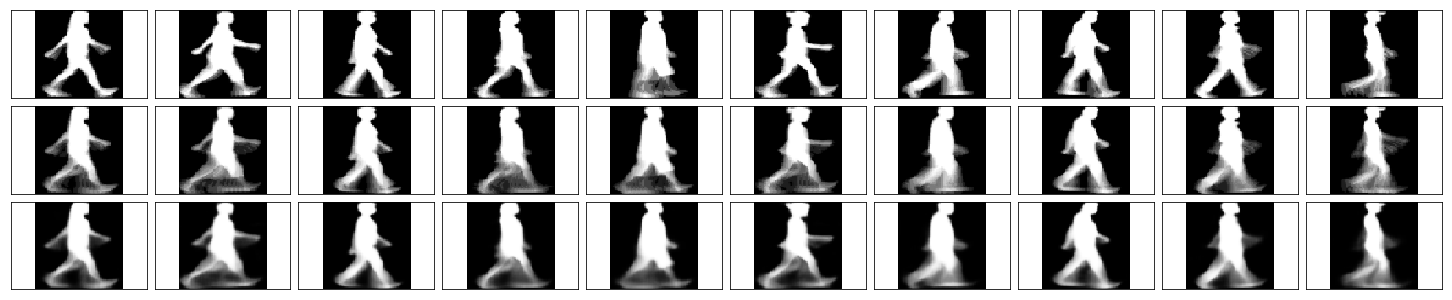

In [14]:
loaded_graph = tf.Graph()
save_model_path = './checkpoints_view_invariant/choosed/5to10_add-more-data_lr=0.0003_nl=3_bs=80_dim=128.ckpt'
with tf.Session(graph=loaded_graph) as sess:
        # Load model
    loader = tf.train.import_meta_graph(save_model_path + '.meta')
    loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
    test_inputs = loaded_graph.get_tensor_by_name('inputs_targets/inputs_1:0')
    test_targets = loaded_graph.get_tensor_by_name('inputs_targets/targets_1:0')
    test_training = loaded_graph.get_tensor_by_name('training:0')
    test_keep_p = loaded_graph.get_tensor_by_name('keep_prob:0')

    test_decoded = loaded_graph.get_tensor_by_name('output_layer/decoded:0')
    test_MSE= loaded_graph.get_tensor_by_name('MSE:0')

#     test_mse = []
#     test_acc = []
#     mean_test_mse = 0
#     mean_test_acc = 0

#     for ii, (test_batch, test_target_batch) in enumerate(get_batches(
#                                          np.concatenate([val_x[3000+ii*500:3000+(ii+1)*500], test_x[3000+ii*500:3000+(ii+1)*500]], axis=0), 
#                                          np.concatenate([val_y[3000+ii*500:3000+(ii+1)*500], test_y[3000+ii*500:3000+(ii+1)*500]], axis=0), test_batch_size)):
#     im = np.reshape(imresize(imread('./OULP-C1V2_Pack/Samples/0000059_85_GEI_1f.png'), [64,64],  interp='nearest'), [1,64,64,1])
    in_imgs = test_x[1000:1010]
    feed_dict = {test_inputs: in_imgs,
                         test_training: 1,
                         test_training:True
                        }

    test_decoded_img = sess.run(test_decoded, feed_dict=feed_dict)
#     imsave('./OULP-C1V2_Pack/Samples/pred_1f_2.png', np.reshape(test_decoded_img, [64,64]))
    for ii, p_img in enumerate(test_decoded_img):
        imsave('./OULP-C1V2_Pack/Samples/5f-10f-samples/predicted/{}.png'.format(ii+1), np.reshape(p_img, [64,64]))
        
    fig, axes = plt.subplots(nrows=3, ncols=10, sharex=True, sharey=True, figsize=(20,4))

    target_imgs = test_y[1000:1010]
                    
                    # plot out
    for images, row in zip([in_imgs, target_imgs, test_decoded_img], axes):
        for img, ax in zip(images, row):
            ax.imshow(img.reshape((64, 64)), cmap='Greys_r')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)


    fig.tight_layout(pad=0.1)
#     for idx, pred_img in enumerate(test_decoded_img):
#         imsave('./OULP-C1V2_Pack/Samples/pred_{}.png'.format(idx+1), np.reshape(pred_img, [64,64])) 
        
#     for idx, pred_img in enumerate(test_x[10:20]):
#         imsave('./OULP-C1V2_Pack/Samples/test_x_{}.png'.format(idx+1), np.reshape(pred_img, [64,64])) 
        
#     for idx, pred_img in enumerate(test_y[10:20]):
#         imsave('./OULP-C1V2_Pack/Samples/test_y_{}.png'.format(idx+1), np.reshape(pred_img, [64,64])) 
#     save_decoded(test_decoded_img, New_folder_path, ii)

#     test_ACC = cal_accuracy(test_decoded_img, test_target_batch)

#     test_mse.append(test_mean_squared_error)
#     test_acc.append(test_ACC)
